In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import re
import matplotlib.patches as patches
import matplotlib
import inflect

In [3]:
df = pd.read_csv("Farmer_dataPRICE.csv")

In [4]:
df.head()

,Name,id,Product,Weight(kg),Arrival,BestBefore,Maximum
0,shefali,-2298907791602927432,Tomato Big,37.5,2013-06-16,2013-06-22,40.0
1,anushka,-3763883785994142627,Tomato Small,29.0,2013-06-16,2013-06-22,32.0
2,mehtab,-7306772913005020966,Potato Red,20.5,2013-06-16,2013-06-22,21.0
3,mercy,-5690939918981728182,Potato White,15.5,2013-06-16,2013-06-22,16.0
4,mehnaz,-6840582954423772625,Carrot,32.5,2013-06-16,2013-06-22,35.0


In [6]:
grouped_data = df.groupby(['Name', 'Product'])['Weight(kg)'].sum().unstack()
grouped_data

Product,Apple,Banana,Brinjal Long,Brocauli,Carrot,Grapes,Jack Fruit,Lime,Mango,Okara,Papaya,Potato Red,Potato White,Raddish Red,Tomato Big,Tomato Small
Name,,,,,,,,,,,,,,,,
aamina,12762.5,8175.0,3831.5,3527.5,5808.5,6652.5,2831.5,24145.0,3987.5,6131.5,7302.0,4521.0,2162.0,662.5,5636.0,5756.0
anushka,14850.0,9017.5,2924.0,3800.0,5655.5,7037.5,2317.5,27570.0,3370.0,5610.5,7021.0,3479.5,1843.0,1277.5,4586.0,5871.0
divy,14312.5,7805.0,3149.5,5356.5,5696.5,8850.0,2736.5,33785.0,3205.0,6395.0,6890.0,4094.0,2278.0,841.5,5012.5,5229.0
fakir,13495.0,6377.5,3397.0,3038.5,6064.0,7555.0,3190.0,25270.0,3900.0,4727.5,6765.0,4041.0,1951.5,1377.5,4907.0,5308.5
guldasta,12700.0,5871.5,3601.0,4180.0,5292.5,8910.0,2582.0,36155.0,3292.5,6741.5,6832.5,4050.0,2504.5,784.0,5317.0,5493.0
gulnaz,16575.0,5635.0,3858.0,4606.5,6555.0,8837.5,2318.0,33927.5,2327.5,6097.0,7742.5,4835.0,2250.5,662.5,5444.5,5804.5
haneef,14665.0,6462.5,3758.0,4402.5,5428.0,7000.0,3026.5,31115.0,3255.0,6755.0,6902.5,3817.0,2172.0,796.0,5535.5,4853.0
jagdiesh,13565.0,6754.0,2864.5,3576.5,6206.5,7410.0,2247.0,32770.0,2762.5,5367.0,5585.0,5473.5,2066.5,769.0,4278.0,5144.0
jasmen,15250.0,6695.0,3815.0,3957.0,5964.0,9612.5,2202.5,27945.0,3125.0,5940.5,7722.5,5114.5,2426.5,749.0,4392.5,4913.5


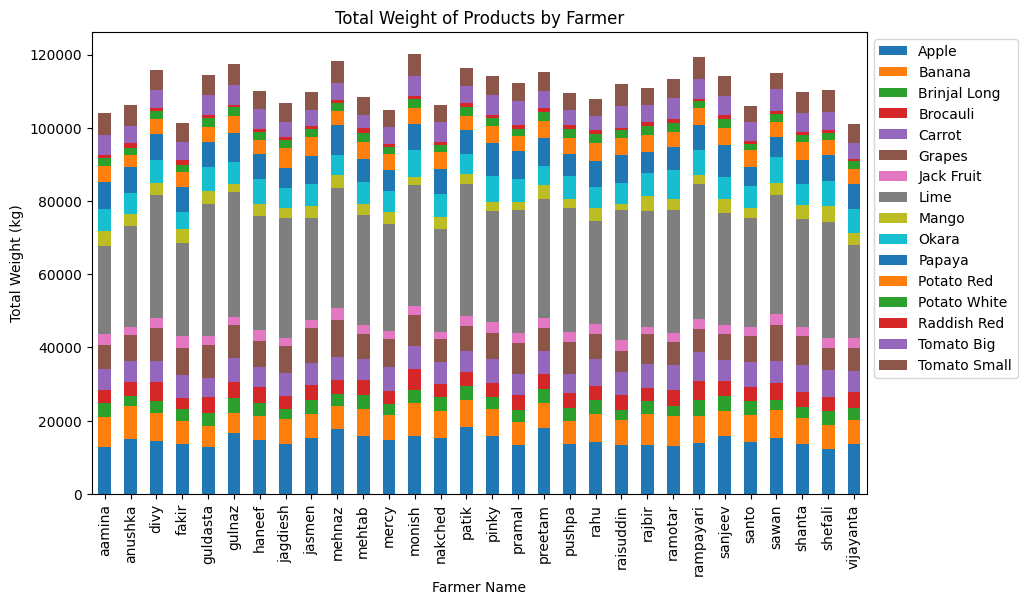

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Farmer Name')
plt.ylabel('Total Weight (kg)')
plt.title('Total Weight of Products by Farmer')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


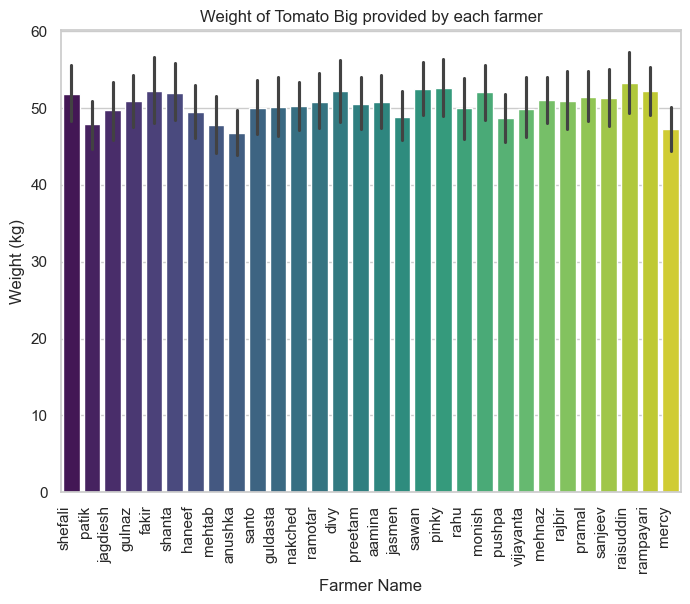

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


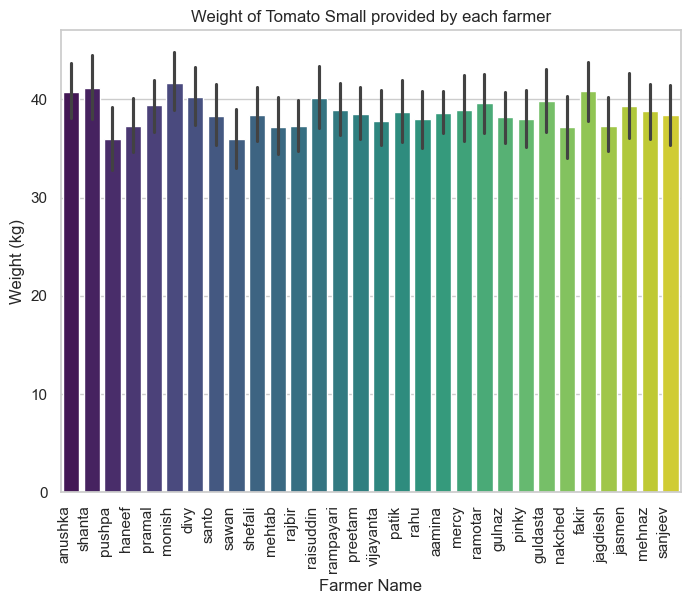

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


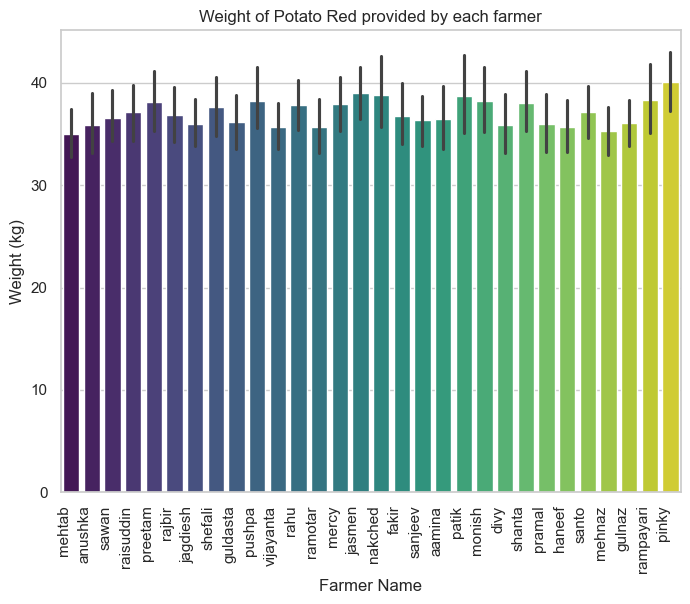

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


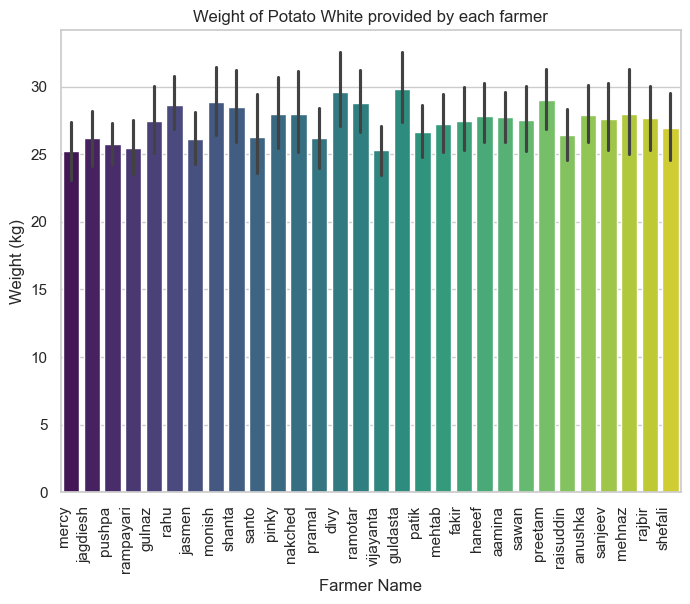

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


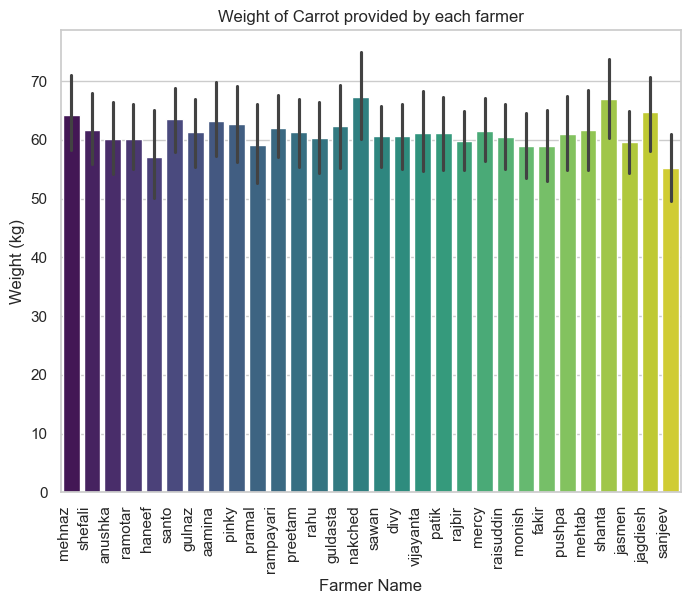

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


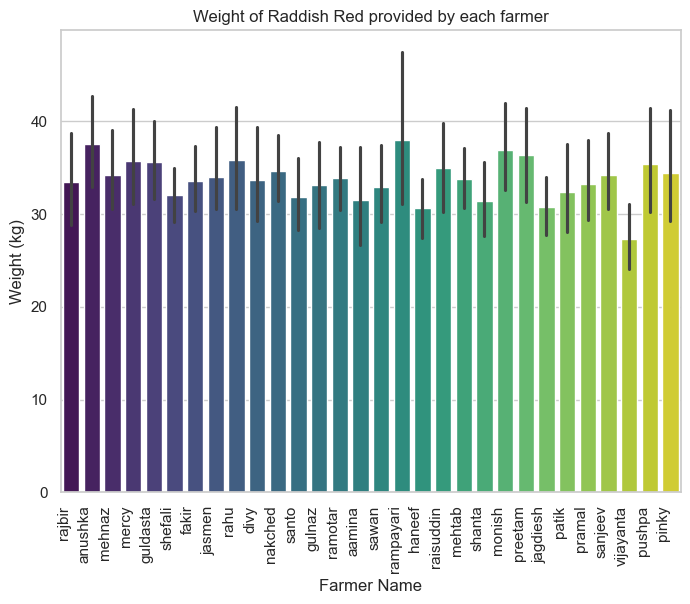

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


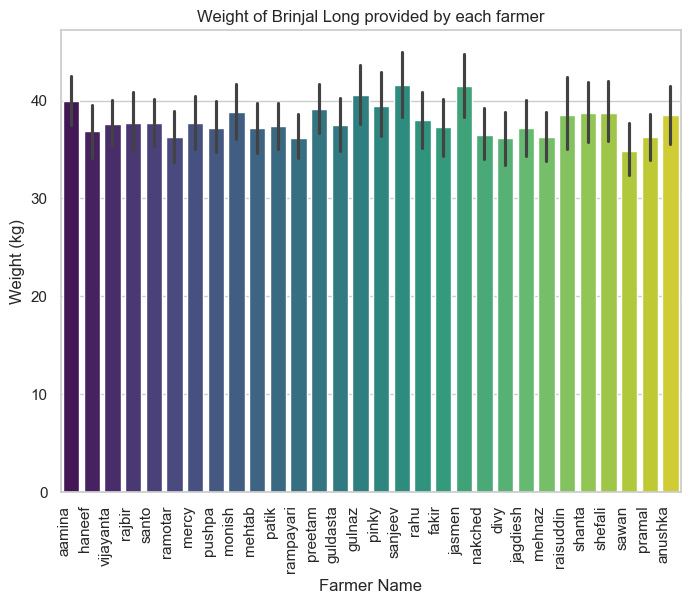

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


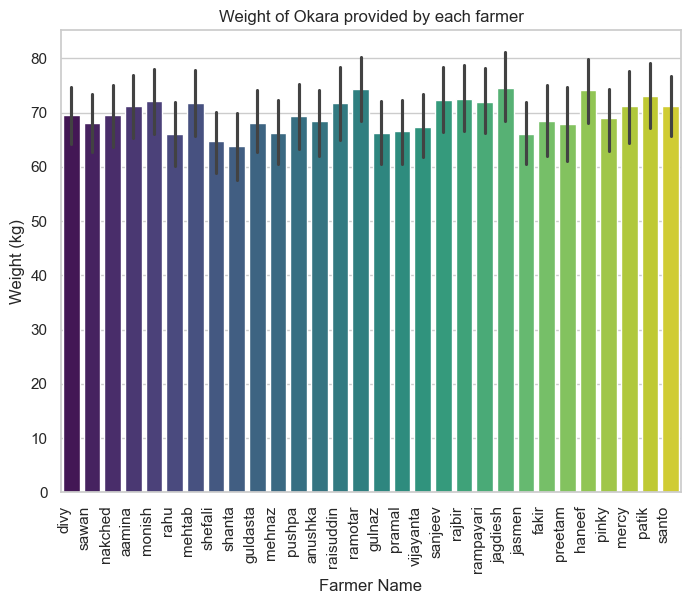

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


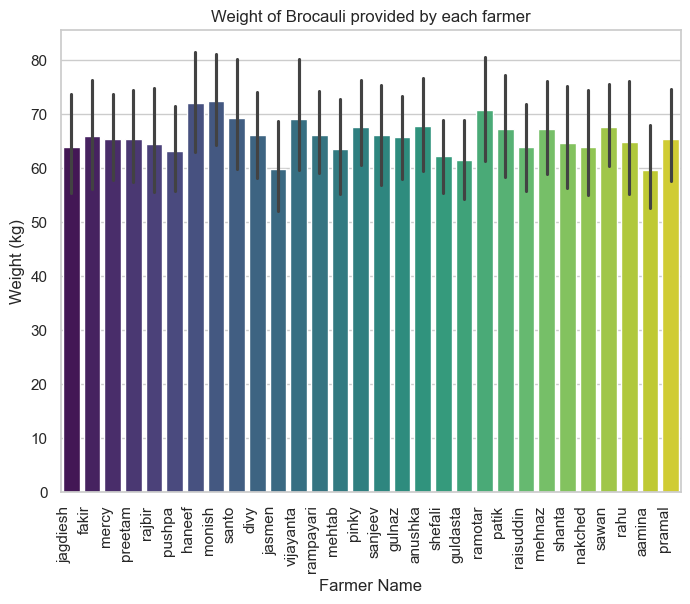

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


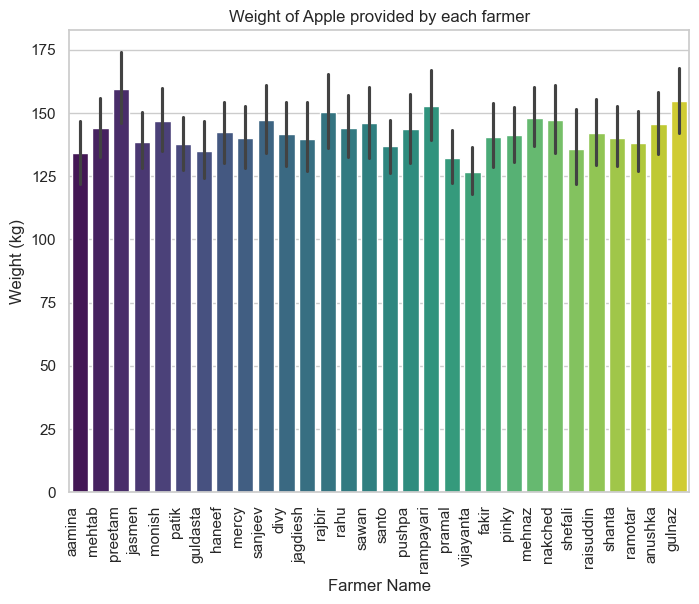

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


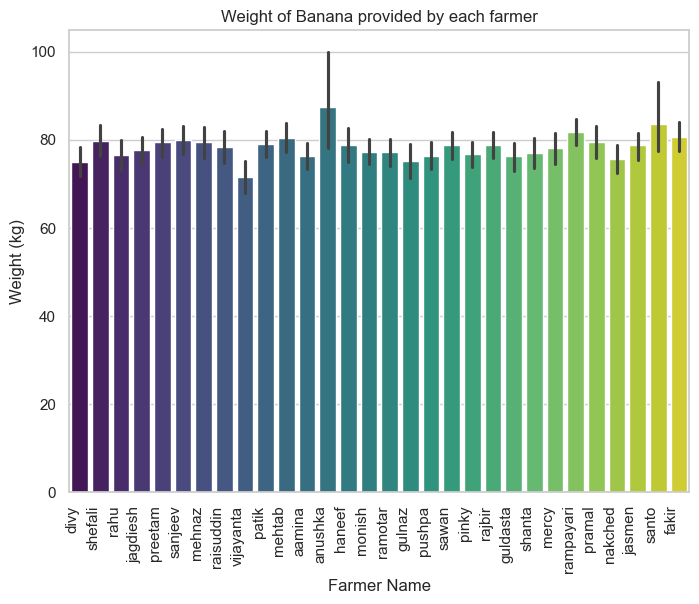

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


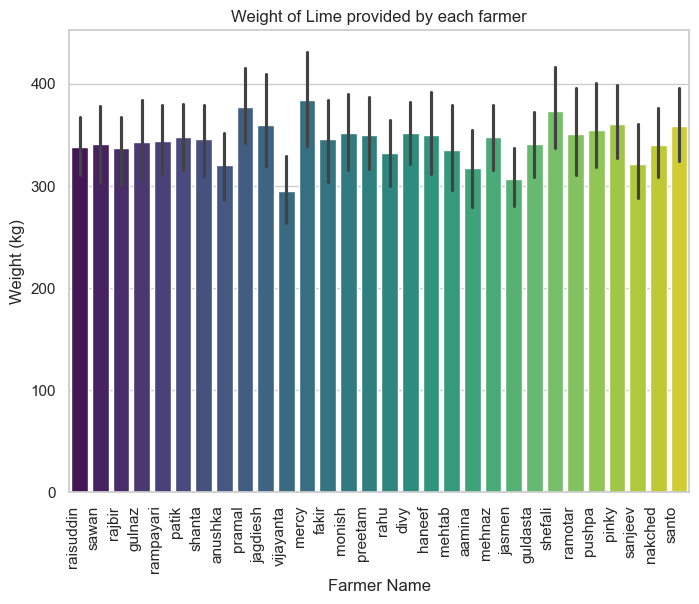

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


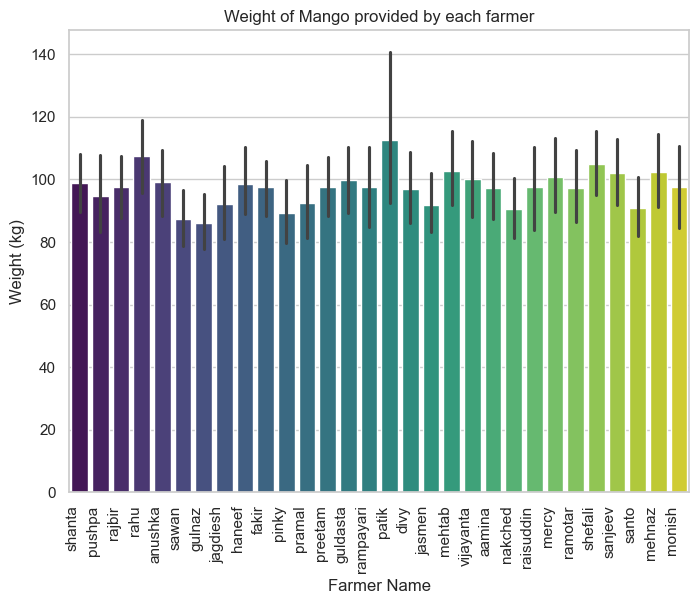

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


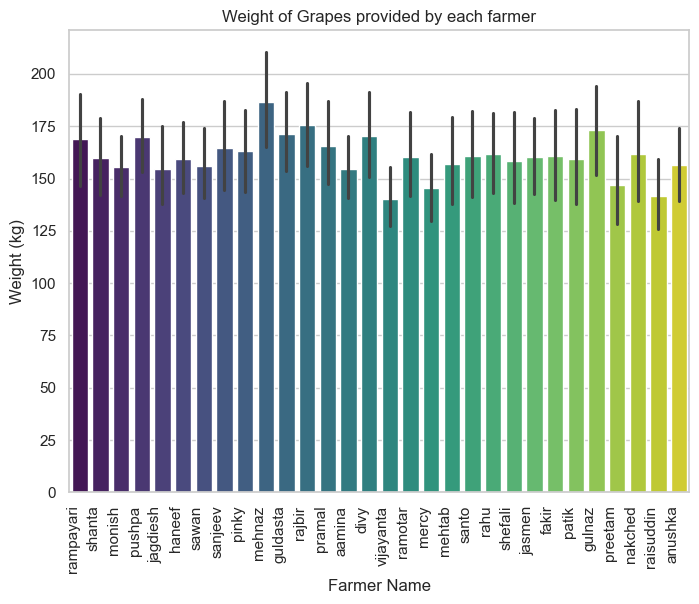

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


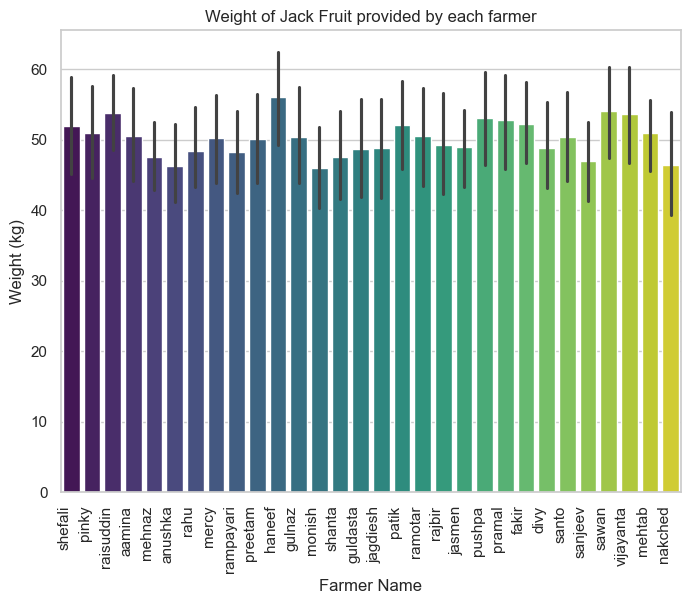

C:\Users\acer\AppData\Local\Temp\ipykernel_30244\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


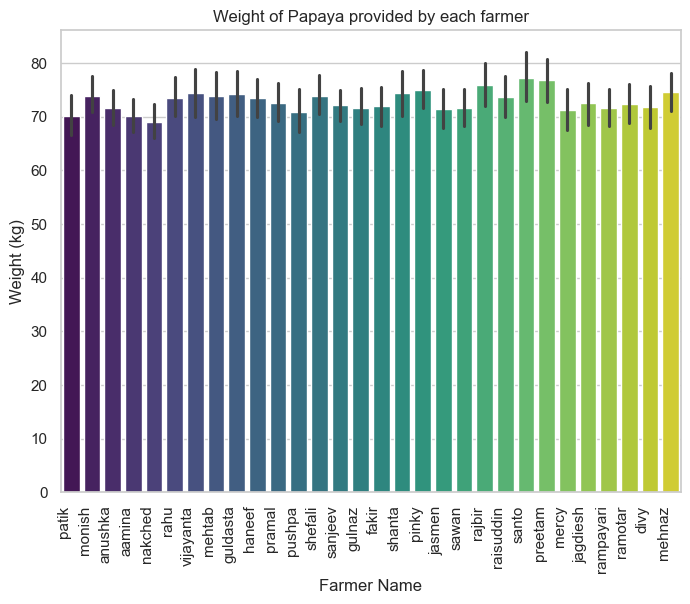

In [8]:
sns.set(style="whitegrid")

for product in df['Product'].unique():
    plt.figure(figsize=(8, 6))
    product_df = df[df['Product'] == product]
    sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')
    plt.xlabel('Farmer Name')
    plt.ylabel('Weight (kg)')
    plt.title(f'Weight of {product} provided by each farmer')
    plt.xticks(rotation=90, ha='right')
    
    plt.show()